In [1]:
import Metrica_IO as mio
import Metrica_Vizuals as miz
import Metrica_Velocities as mvel
import Physical_Performace as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DATA_DIR=r'C:\Users\User\Desktop\FootballAnalysis\sample-data-master'
game_id=2
team_1="Home"
team_2="Away"

#Reading Event & Tracking Data
# StartFrame in event data is sychnronized-aligned with index in tracking data
event=mio.read_event_data(DATA_DIR,game_id)

event=mio.transform_coord_system(event)

tracking_home=mio.read_tracking_data(DATA_DIR,game_id,team_1)
tracking_away=mio.read_tracking_data(DATA_DIR,game_id,team_2)

tracking_away=mio.transform_coord_system(tracking_away)
tracking_home=mio.transform_coord_system(tracking_home)


Reading team: home
Reading team: away


In [3]:
#Reverse directions such that the home team is always attacking from left to right
# DEFAULT COLORS: Home Team: Black, Away Team: Red 
event,tracking_home,tracking_away=mio.set_single_playing_direction(event,tracking_home,tracking_away)

### Calculating Players' velocities based on Tracking Data

In [4]:
# Add players velocities into the tracking data DataFrame
#Smoothing via moving average is set to True by Default.

tracking_home=mvel.calc_player_velocities(tracking_home)
tracking_away=mvel.calc_player_velocities(tracking_away)

Calculating velocities for:  Home
Calculating velocities for:  Away


### Plotting Frame with Players' Velocities

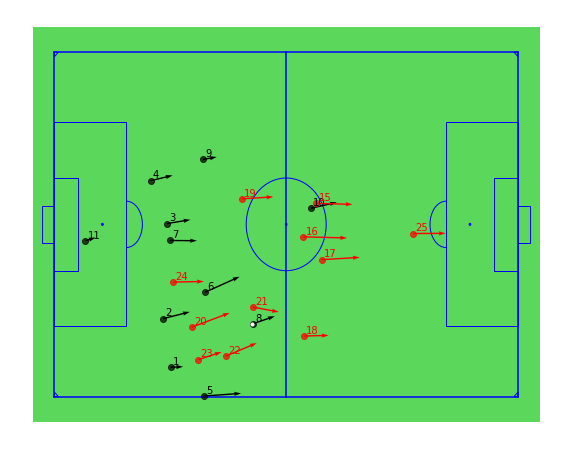

In [5]:
# Set include_player_velocities to True
miz.plot_frame(tracking_home.loc[20000],tracking_away.loc[20000],include_player_velocities=True,annotate_player=True);
'''
We can clearly see the Home Team (Black color), trying to set an attack to score a goal. In this frame, it seems like a
counter-attack , as the Player-25 (goalkeeperof Away Team) is far outside their goal area and
most of the players of the Home Team are behind the center line (previously defending positions). Player 8 has position
of the ball.
''';

### Make a movie and save it in PLOTDIR directory

In [7]:
PLOT_DIR=DATA_DIR+"\movies"

'''
Give this function a moment to generate the movie.
'''

# Saves Movie with Velocity - Home Goal at minute 49.
miz.save_movie(tracking_home.iloc[73600:73600+500],tracking_away.iloc[73600:73600+500],PLOT_DIR,
               file_name="Home_Goal_Vel_Smooth",include_player_velocities=True)

Generating movie..
Wait...
Ready


In [8]:
# Saves Movie with Velocity - Away Goal at minute 35.
miz.save_movie(tracking_home.iloc[52590:52590+650],tracking_away.iloc[52590:52590+650],PLOT_DIR,
               file_name="Away_goal_Vel_Smooth",include_player_velocities=True)


Generating movie..
Wait...
Ready


### Calculating summary performance metrics for each player

In [10]:
# Get players summary for home and away teams
home_summary=pp.get_players_summary(tracking_home)
away_summary=pp.get_players_summary(tracking_away)

If we take a look at the 87985 index (Frame) in the Tracking Data for the Away Team we can see that 
Player 22 and 26 have the same position in the pitch. These are the first coordinates for Player 26 and last
for Player 22 since there has been a SUBSTITUTION between them.
That can be spotted from the above table and especially in Minutes Played field.

**Minutes Played of 22 + Minutes Played of 26 = 94.1033**

In [14]:
away_summary

,Minutes Played,Distance (km),Walking (km),Jogging (km),Running (km),Sprinting (km),# of Sprints
Away_15,94.1033,10.0637,4.06421,3.82066,2.1156,0.0631871,3
Away_16,94.1033,9.49196,3.75801,4.44272,1.22731,0.0639281,4
Away_17,94.1033,9.32334,4.06844,3.9628,1.20759,0.0845107,3
Away_18,94.1033,10.3941,3.77153,4.36522,2.05209,0.205214,11
Away_19,94.1033,11.1546,3.65751,4.78563,2.56309,0.148424,8
Away_20,94.1033,10.8552,3.35297,5.29891,2.17585,0.0274533,1
Away_21,94.1033,10.0347,3.83955,4.43153,1.70478,0.0588208,3
Away_22,58.656,6.3626,2.49719,2.52556,1.19758,0.142267,8
Away_23,94.1033,9.66031,3.9289,3.39318,2.17756,0.160678,10
Away_24,94.1033,9.91336,3.78949,4.01068,1.9423,0.170883,8


In [16]:
tracking_away.loc[87984:87986,["Away_22_x","Away_22_y","Away_26_x","Away_26_y"]]

,Away_22_x,Away_22_y,Away_26_x,Away_26_y
Frame,,,,
87984,-1.83168,-34.07412,NaN,NaN
87985,-1.81154,-34.06528,-1.81154,-34.06528
87986,NaN,NaN,-1.79352,-34.05712


3 SUBSTITUTIONS occured in Home Team between Players **10 & 14 , 13 & 8 , 12 & 4**.

In [13]:
home_summary

,Minutes Played,Distance (km),Walking (km),Jogging (km),Running (km),Sprinting (km),# of Sprints
Home_1,94.1033,10.3828,3.70331,4.43523,2.15807,0.0862124,5
Home_10,83.8247,8.96821,3.85879,3.43149,1.4089,0.269032,14
Home_11,94.1033,5.21521,4.40042,0.781947,0.0303767,0.00246188,0
Home_12,30.302,3.03775,1.14202,1.03307,0.820622,0.0420428,2
Home_13,23.3633,2.37232,0.874639,0.858968,0.582351,0.0563609,2
Home_14,10.2787,1.08412,0.437078,0.402657,0.235202,0.0091825,0
Home_2,94.1033,9.85621,4.08531,4.07035,1.61682,0.0837362,3
Home_3,94.1033,9.55652,4.17785,3.83553,1.38936,0.153776,8
Home_4,63.8013,7.18196,2.65667,3.25244,1.25851,0.0143299,0
Home_5,94.1033,11.9147,3.58398,4.65857,3.52092,0.151272,8


### Plotting distances (km) for Away Players

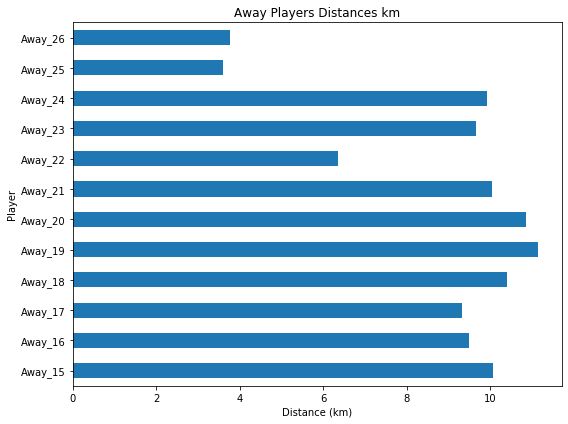

In [30]:
ax=away_summary["Distance (km)"].plot(kind='barh',title="Away Players Distances km",figsize=(8,6))
ax.set_ylabel("Player")
ax.set_xlabel("Distance (km)")
plt.tight_layout()

### Plotting distance covered at every speed for the Away Team

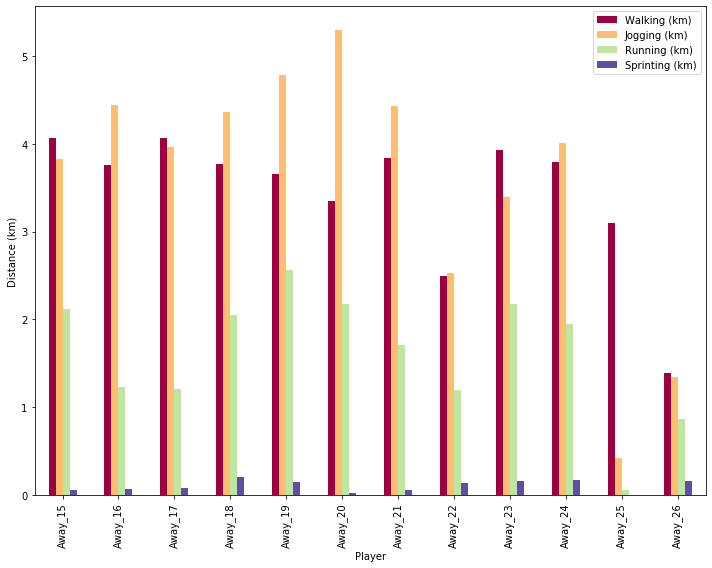

In [33]:
ax=away_summary[["Walking (km)","Jogging (km)","Running (km)","Sprinting (km)"]].plot(kind='bar',
                                                                                      colormap='Spectral',figsize=(10,8))
ax.set_xlabel("Player")
ax.set_ylabel("Distance (km)")
ax.legend(loc='best')
plt.tight_layout()

### Plotting Top Speed Reached From Home Players

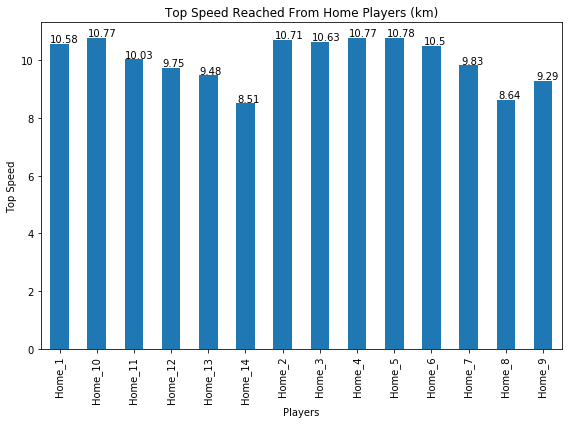

In [83]:
home_player_speeds=[x for x in tracking_home.columns if "_speed" in x]
top_speed=pd.DataFrame(index=home_player_speeds,columns=["Top Speed"])

for ps in home_player_speeds:
    top_speed.loc[ps,"Top Speed"]=tracking_home[ps].max()

ax=top_speed.plot(kind='bar',title="Top Speed Reached From Home Players (km)",figsize=(8,6),legend=False)
ax.set_xticklabels([x.split("_speed")[0] for x in top_speed.index ])
plt.xlabel("Players")
plt.ylabel("Top Speed")
plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [48]:
home_kms=home_summary["Distance (km)"].sum()
away_kms=away_summary["Distance (km)"].sum()
print("Total Kilometers Run by Each Team: ")
print("\x1B[30m Home team: ",home_kms)
print("\033[91m Away team: ",away_kms)

Total Kilometers Run by Each Team: 
 Home team:  110.98968528826254
 Away team:  104.60970543069749
